In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

import os
import sys
import inspect
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset.dataset import get_test_datasets, get_validation_datasets, get_dataset_shapes
from experiment.model import get_scalar_model, get_vector_model
from experiment.learning import validate_model, validate_model_multiple, test_model, test_model_multiple

In [2]:
train_dataset, test_dataset = get_test_datasets('kinematics', random_seed=200, feature_range=(0,1))
datasets_generator_fun = lambda: get_validation_datasets('kinematics', random_seed=200, feature_range=(0,1))
dataset_shapes = get_dataset_shapes('kinematics')
num_tries = 15

dataset_shapes

([8], [1])

# Scalar network without hidden layers

Average elapsed k-fold validation time: 1024.33403 sec
Last measures: [0.0202248215675354, 0.02022482119500637, 0.02022482119500637, 0.0202248215675354, 0.06875093728303909]


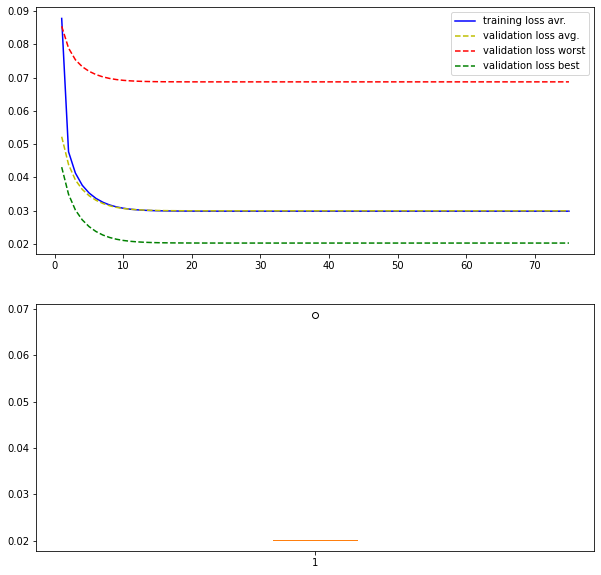

In [3]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=75, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

# Scalar network with one hidden layer

### S(2)

Average elapsed k-fold validation time: 1120.97127 sec
Last measures: [0.11683371625840663, 0.06943206936120987, 0.21504681147634983, 0.11770137622952462, 0.06744349598884583]


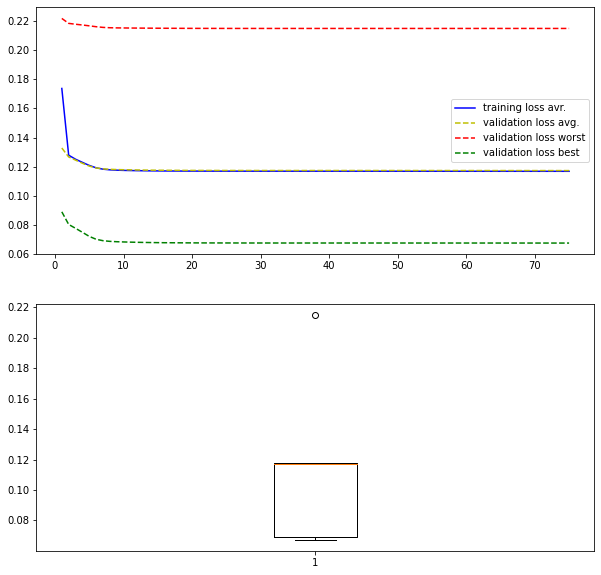

In [4]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[2], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=75, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### S(5)

Average elapsed k-fold validation time: 635.31507 sec
Last measures: [0.06782789900898933, 0.16604309268295764, 0.11578610017895699, 0.11406197380274534, 0.16617790162563323]


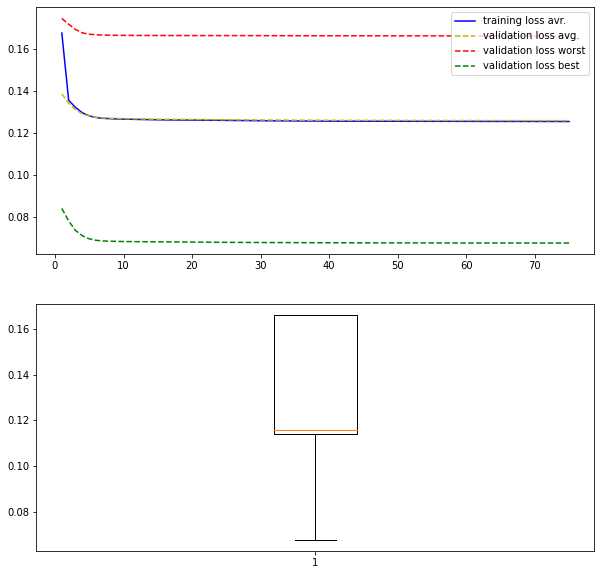

In [5]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[5], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=75, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### S(15)

Average elapsed k-fold validation time: 658.30011 sec
Last measures: [0.010412781685590743, 0.11115103969350457, 0.06230292655527592, 0.11430167835205793, 0.011550211533904075]


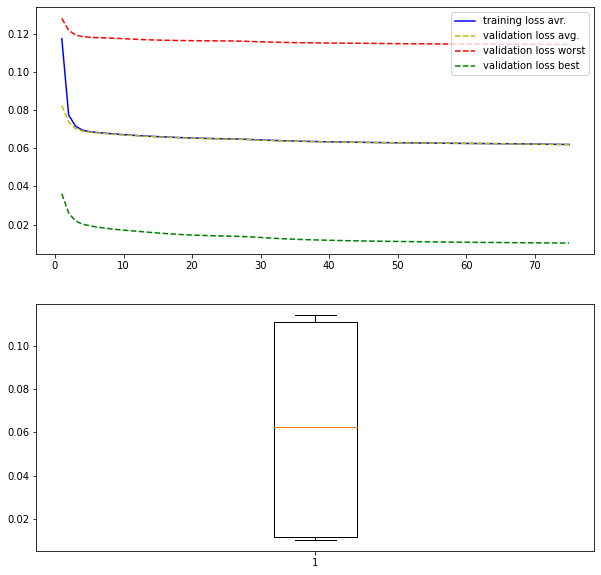

In [6]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[15], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=75, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### S(30)

Average elapsed k-fold validation time: 654.60225 sec
Last measures: [0.1590770828537643, 0.10862376894801855, 0.2624525547027588, 0.058299435675144194, 0.16052288860082625]


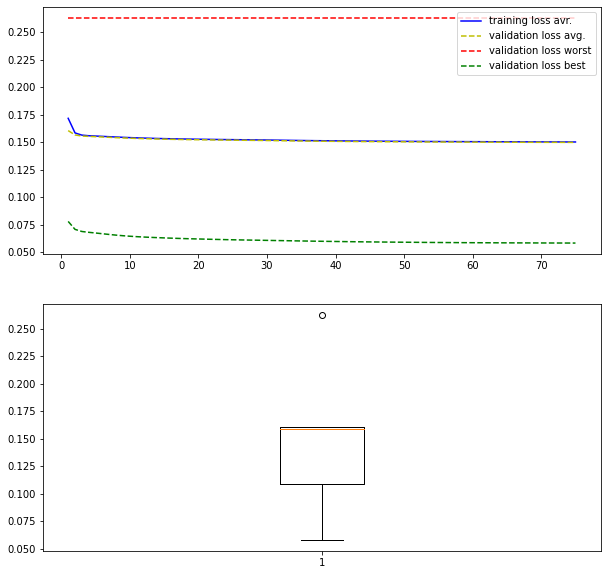

In [7]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[30], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=75, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

# Scalar network with three hidden layers

### S(2,2,2)

Average elapsed k-fold validation time: 911.01047 sec
Last measures: [0.21301811635494233, 0.07732179053127766, 0.17054128646850586, 0.1674625866115093, 0.21503601633012295]


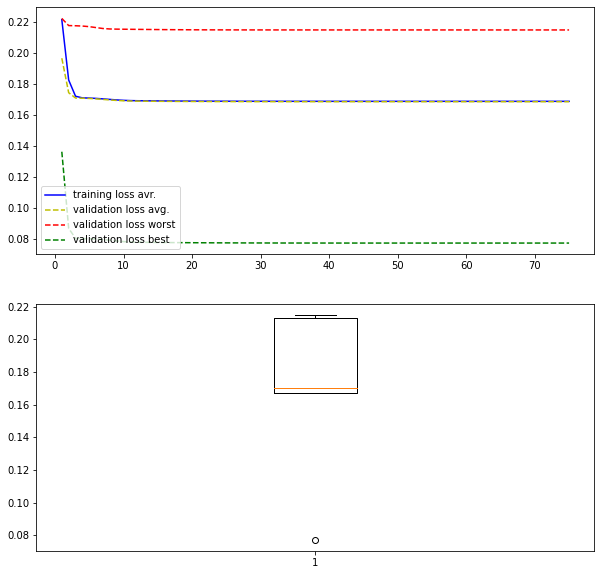

In [8]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[2,2,2], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=75, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### S(10,7,5)

Average elapsed k-fold validation time: 887.05620 sec
Last measures: [0.11606170060113072, 0.11097439406439662, 0.11031698286533356, 0.21491117775440216, 0.16197319980710745]


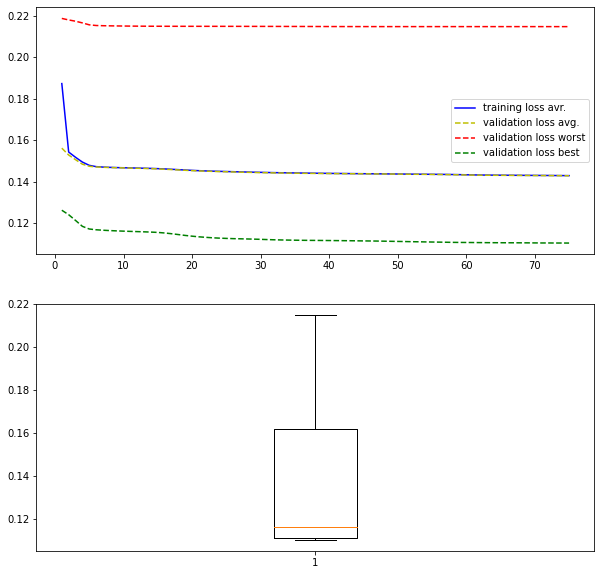

In [9]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[10,7,5], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=75, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

# Vector network with one hidden layer (c=1), unique weights

### V1(2):U(2)

Average elapsed k-fold validation time: 982.60002 sec
Last measures: [0.07423248998820782, 0.07072859164327383, 0.21379573456943035, 0.1188226830214262, 0.21408778317272664]


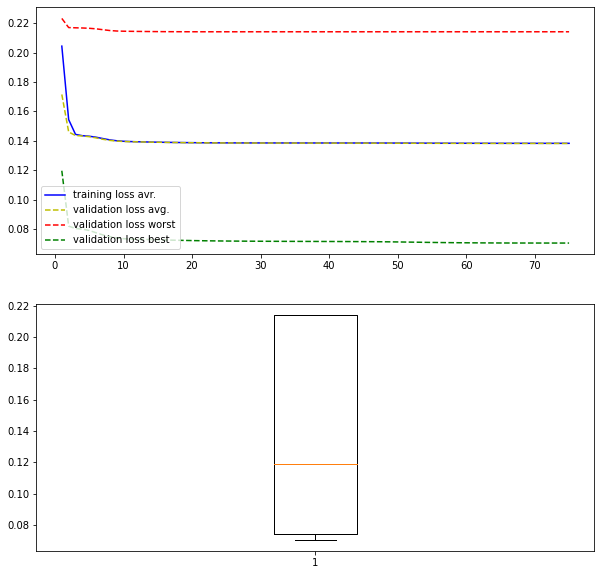

In [10]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(2,), inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=75, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### V1(5):U(2)

Average elapsed k-fold validation time: 936.60061 sec
Last measures: [0.0713126003742218, 0.1642843134701252, 0.11687266826629639, 0.1655426312237978, 0.1644502602517605]


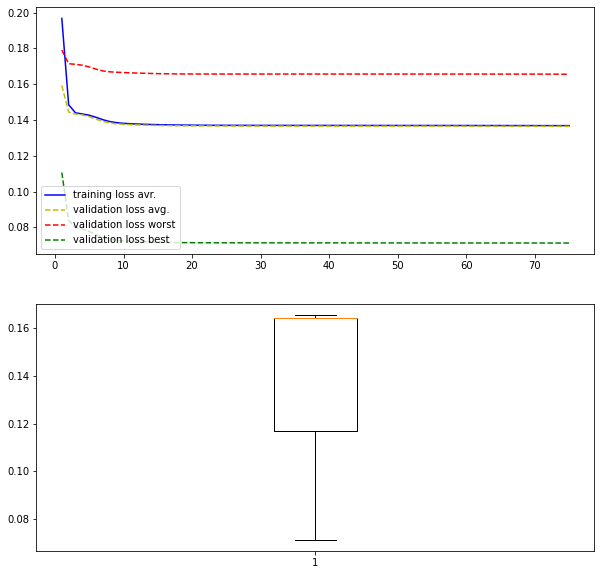

In [11]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(5,), inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=75, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

# Vector network with one hidden layer (c=1), shared weights

### V1(2):S(2)

Average elapsed k-fold validation time: 746.03489 sec
Last measures: [0.1666517172008753, 0.16641948148608207, 0.16461229585111142, 0.02857716903090477, 0.16668736785650254]


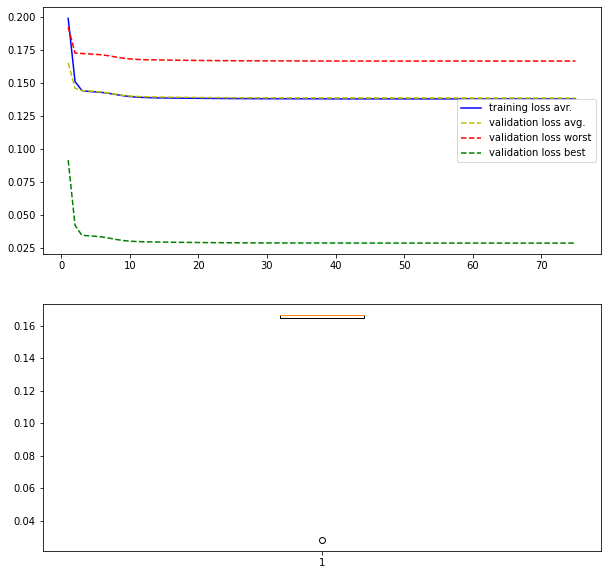

In [12]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(2,), inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=75, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### V1(5):S(2)

Average elapsed k-fold validation time: 345.72459 sec
Last measures: [0.16642354466021061, 0.2624525547027588, 0.16551110409200193, 0.11679178960621357, 0.2138016875833273]


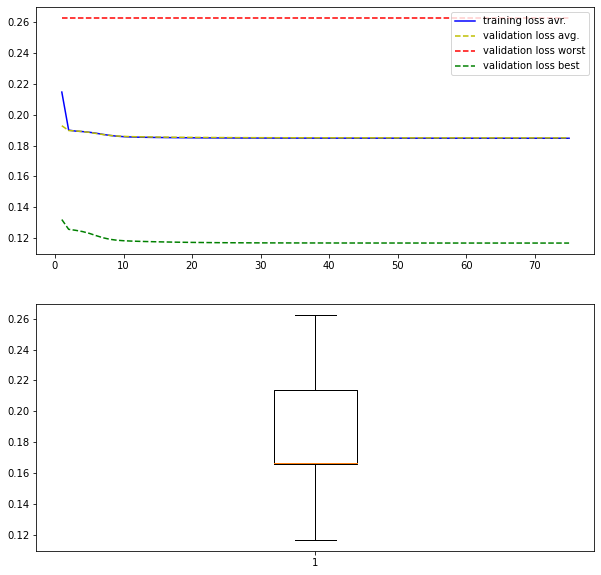

In [13]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(5,), inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=75, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")